# 3 Nonlinear Dimensionality Reduction

## 3.1 Plot

### (1) kernel PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

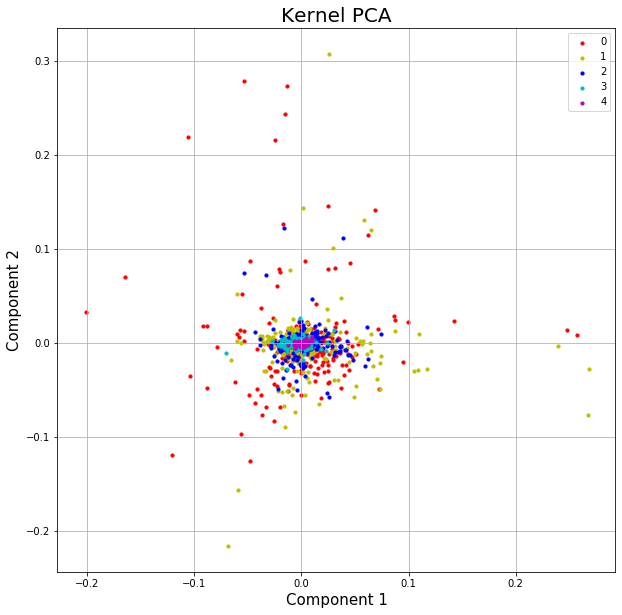

In [2]:
cols = list(pd.read_csv("DataB.csv", nrows =1))
# delete index and gnd columns
digit_data = pd.read_csv("DataB.csv", usecols = [i for i in cols if i !='gnd' and i !='Unnamed: 0'])
data_b = pd.read_csv("./DataB.csv")
digit_data_arr = digit_data.to_numpy()
#Kernel PCA
kpca = KernelPCA(n_components=2, kernel ='rbf', random_state=42) 
digit_data_kpca = kpca.fit_transform(digit_data) 
digit_data_kpcadf = pd.DataFrame(digit_data_kpca)
digit_data_kpca1 = pd.concat([digit_data_kpcadf, data_b[['gnd']]], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Kernel PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'y', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = digit_data_kpca1['gnd'] == target
    ax.scatter(digit_data_kpca1.loc[indicesToKeep, 0]
               , digit_data_kpca1.loc[indicesToKeep, 1]
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

### (2) Isomap

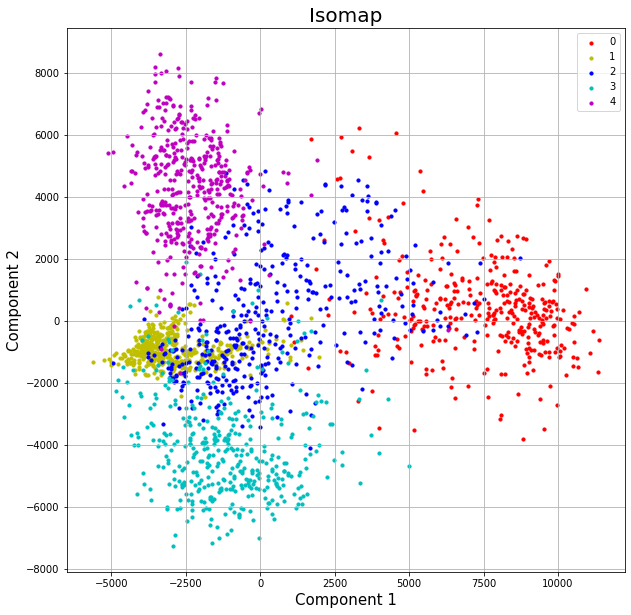

In [3]:
iso = manifold.Isomap(n_components=2)
iso.fit(digit_data)
manifold_2Da = iso.transform(digit_data)
manifold_2Disomap = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])
manifold_2Disomap1 = pd.concat([manifold_2Disomap, data_b[['gnd']]], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Isomap', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'y', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = manifold_2Disomap1['gnd'] == target
    ax.scatter(manifold_2Disomap1.loc[indicesToKeep, 'Component 1']
               , manifold_2Disomap1.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

### (3) Locally Linear Embedding (LLE)

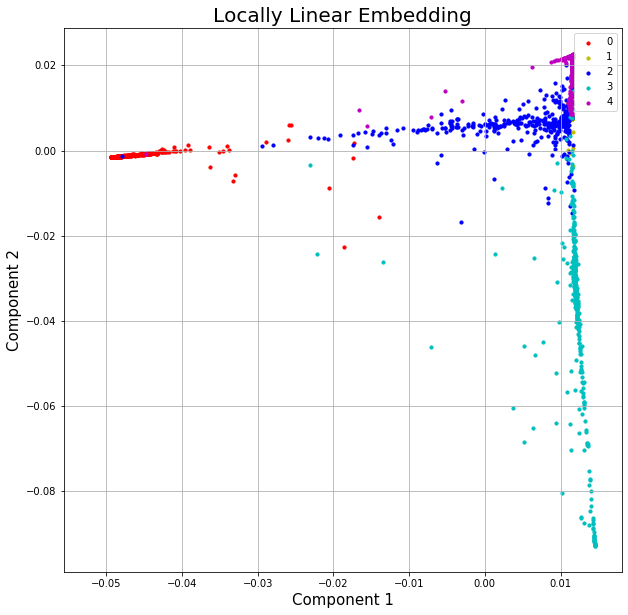

In [4]:
lle = LocallyLinearEmbedding(n_components = 2,random_state = 42)
manifold_2Dlle = lle.fit_transform(digit_data)
manifold_2Dlledf = pd.DataFrame(manifold_2Dlle, columns=['Component 1', 'Component 2'])
manifold_2Dlledf1 = pd.concat([manifold_2Dlledf, data_b[['gnd']]], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Locally Linear Embedding', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'y', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = manifold_2Dlledf1['gnd'] == target
    ax.scatter(manifold_2Dlledf1.loc[indicesToKeep, 'Component 1']
               , manifold_2Dlledf1.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

### (4) Laplacian Eigenmap

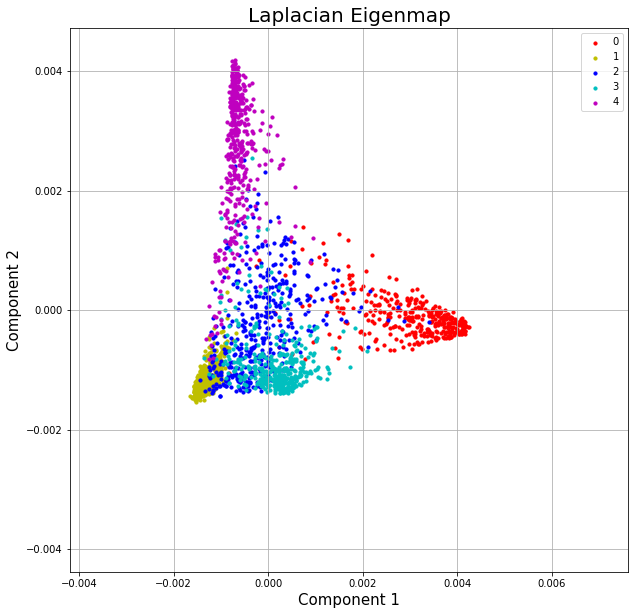

In [5]:
embedding = SpectralEmbedding(n_components=2 , random_state = 42)
embeddingle = embedding.fit_transform(digit_data)
embeddingledf = pd.DataFrame(embeddingle, columns=['Component 1', 'Component 2'])
embeddingledf1 = pd.concat([embeddingledf, data_b[['gnd']]], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Laplacian Eigenmap', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'y', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = embeddingledf1['gnd'] == target
    ax.scatter(embeddingledf1.loc[indicesToKeep, 'Component 1']
               , embeddingledf1.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

### (5) t-SNE

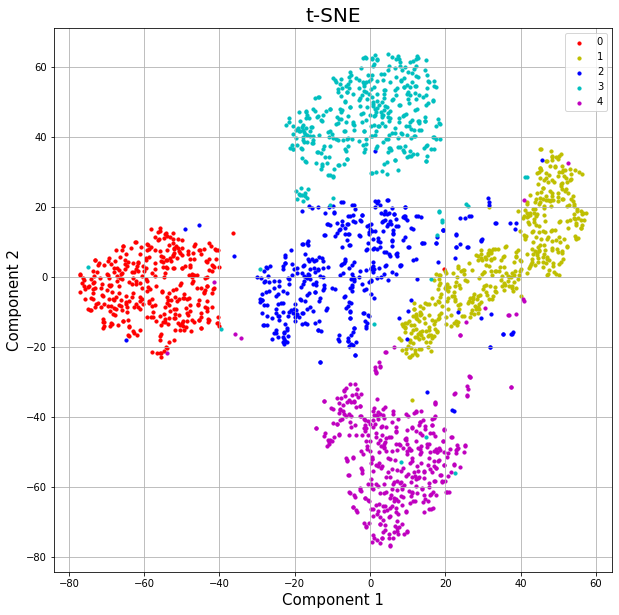

In [6]:
tsne = TSNE(n_components=2 , random_state = 42)
manifold_tsne = tsne.fit_transform(digit_data)
manifold_tsnedf = pd.DataFrame(manifold_tsne, columns=['Component 1', 'Component 2'])
manifold_tsnedf1 = pd.concat([manifold_tsnedf, data_b[['gnd']]], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'y', 'b', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = manifold_tsnedf1['gnd'] == target
    ax.scatter(manifold_tsnedf1.loc[indicesToKeep, 'Component 1']
               , manifold_tsnedf1.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

## 3.2 Plot and compare

Kernel PCA seems like 5 classes all cluster into one center and cannot choose a proper kernel either. Isomap can tell five classes easily and also has not many overlapping parts. LLE can also tell the five classes, but it is not a good model for classify these five classes in this situation. We can easily see the five classes which have five centers in LE graph, but there are many overlapping parts. T-SNE can tell five parts with the blank section and rarely has overlapping points.  

T-SNE seems do better than any other methods. It is clean and has space between clusters. First, we need to consider whether the five classes are easily to be tell or is there many overlapping points or not. Second, is one class have one center or not. Then, the compute time is also to be considered by using time function. Also, we need to consider the bias and variance as well.  

Kernel PCA can do high dimension data. But it is not good enough, which cannot choose an appropriate kernel. And Kernel PCA can give a good re-encoding of the data because of the non-linear manifold. The kernel matrix is n x n, so it will have difficulties if we have lots of data points. Isomap has Legs of octopus. It can keep the global data structure and performs global optimization and use geodesic distances, but it is really slow by computing time. LLE is fast and no local minima, no iterative, but it has no estimate of dimensionality. LLE can find ways of linear reconstruction and usually use weight for linear construction as well in embedding space. LLE is symmetric. LE is kind of similar as LLE. LE and LLE, one preserves locality and one preserves local linearity, so it is usually narrow and weird. They have many similarities than differences. LLE versus Isomap, LLE cannot estimate dimensionality and no theoretical guarantees either. LLE constructs sparse matrix and preserves weights. But Isomap constructs dense matrix and preserves distances. Also, LLE is much faster than Isomap. T-SNE can both consider the local and global. It is clean and has space between clusters. Although T-SNE has the best result, it is hard to tune parameters. 




